# DATA PREPROCESSING

In [72]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# LOAD DATA INTO tf.dataset

In [73]:
#comment
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELs=3
EPOCHS=20

In [74]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "PlantVillage",
   shuffle=True,
   image_size = (IMAGE_SIZE,IMAGE_SIZE),
   batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [75]:
class_names = dataset.class_names
class_names


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [76]:
len(dataset)

68

# DATA VISUALIZATION

In [77]:
for image_batch, label_batch in dataset.take(1):
    print (image_batch[0].shape)

(256, 256, 3)


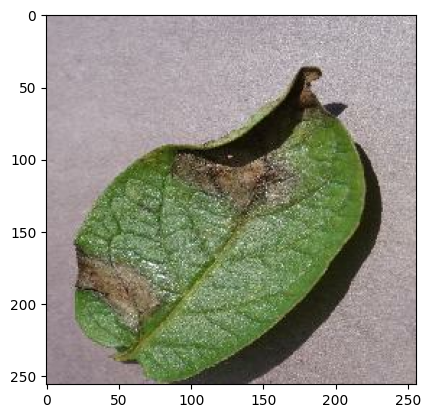

In [78]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

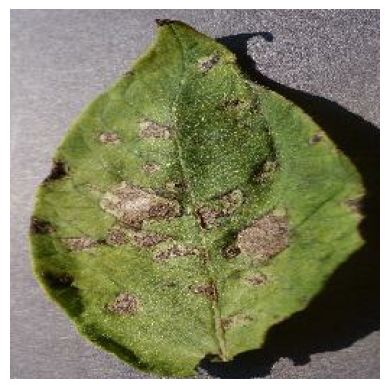

In [14]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

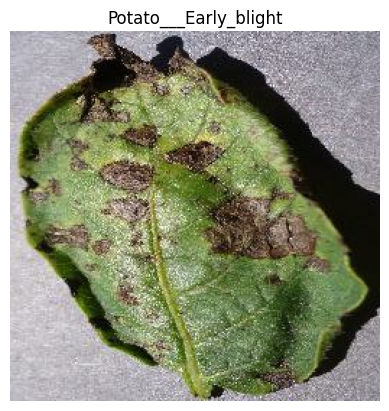

In [116]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    

# TRAIN TEST SPLIT

In [80]:
len(dataset)

68

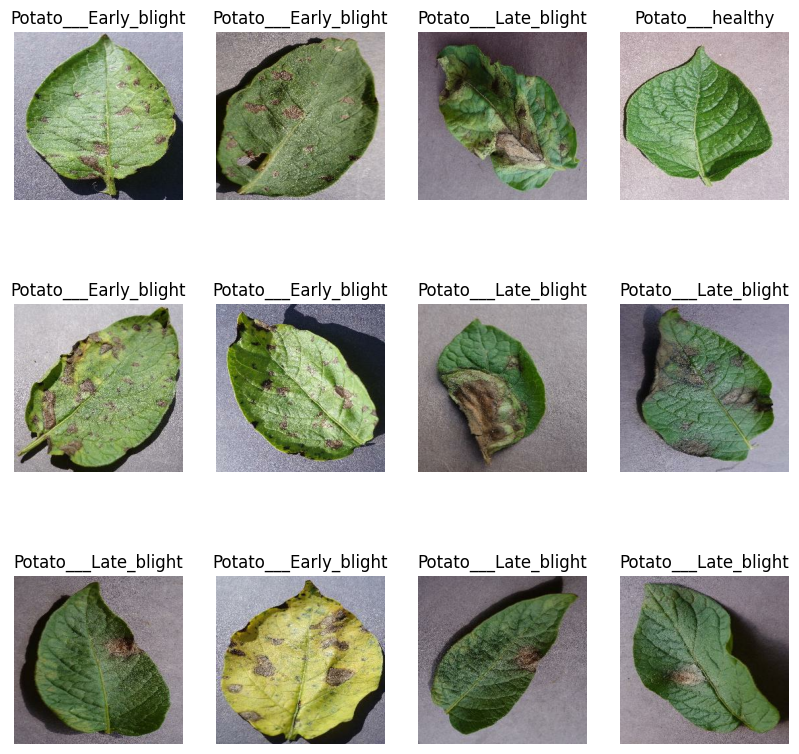

In [81]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [82]:
train_size = 0.8
len (dataset)*train_size

54.400000000000006

In [19]:
80% ==> training
20% ==> 10% validation,10% test

SyntaxError: invalid syntax (1918983628.py, line 1)

In [83]:
train_ds= dataset.take (54)
len(train_ds)

54

In [85]:
test_ds = dataset.skip (54)
len (test_ds)

14

In [86]:
val_size=0.1
len (dataset)*val_size

6.800000000000001

In [87]:
val_ds = test_ds.take(6)
len (val_ds)

6

In [88]:
test_ds = test_ds.skip(6)
len (test_ds)

8

In [89]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    
    if shuffle:
        
        ds = ds.shuffle (shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
        
    train_ds = ds.take(train_size)
        
    val_ds = ds.skip(train_size).take (val_size)
    test_ds = ds.skip(train_size).skip(val_size)
        
    return train_ds, val_ds, test_ds

In [90]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [91]:
len(train_ds)

54

In [92]:
len(val_ds)

6

In [93]:
len(test_ds)

8

# DATA AUGMENTATION

In [94]:
train_ds = train_ds.cache().shuffle(1000).prefetch (buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch (buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch (buffer_size=tf.data.AUTOTUNE)

In [95]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[188. 186. 197.]
  [188. 186. 197.]
  [192. 190. 201.]
  ...
  [155. 154. 162.]
  [165. 164. 172.]
  [170. 169. 177.]]

 [[188. 186. 197.]
  [187. 185. 196.]
  [190. 188. 199.]
  ...
  [167. 166. 174.]
  [166. 165. 173.]
  [158. 157. 165.]]

 [[192. 190. 201.]
  [188. 186. 197.]
  [188. 186. 197.]
  ...
  [167. 166. 174.]
  [161. 160. 168.]
  [151. 150. 158.]]

 ...

 [[156. 160. 172.]
  [153. 157. 169.]
  [153. 157. 169.]
  ...
  [143. 141. 154.]
  [141. 139. 152.]
  [138. 136. 149.]]

 [[147. 151. 163.]
  [150. 154. 166.]
  [153. 157. 169.]
  ...
  [130. 128. 141.]
  [127. 125. 138.]
  [125. 123. 136.]]

 [[137. 141. 153.]
  [144. 148. 160.]
  [149. 153. 165.]
  ...
  [137. 135. 148.]
  [138. 136. 149.]
  [142. 140. 153.]]]


In [96]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing (IMAGE_SIZE, IMAGE_SIZE),layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [97]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.5647059  0.5686275  0.6392157 ]
  [0.5921569  0.59607846 0.6666667 ]
  [0.6392157  0.6431373  0.7137255 ]
  ...
  [0.5764706  0.5686275  0.62352943]
  [0.59607846 0.5882353  0.6431373 ]
  [0.6745098  0.6666667  0.72156864]]

 [[0.6745098  0.6784314  0.7490196 ]
  [0.6392157  0.6431373  0.7137255 ]
  [0.6156863  0.61960787 0.6901961 ]
  ...
  [0.5411765  0.53333336 0.5882353 ]
  [0.53333336 0.5254902  0.5803922 ]
  [0.57254905 0.5647059  0.61960787]]

 [[0.6392157  0.6431373  0.7137255 ]
  [0.59607846 0.6        0.67058825]
  [0.5921569  0.59607846 0.6666667 ]
  ...
  [0.5411765  0.53333336 0.5882353 ]
  [0.5372549  0.5294118  0.58431375]
  [0.57254905 0.5647059  0.61960787]]

 ...

 [[0.78039217 0.76862746 0.8039216 ]
  [0.77254903 0.7607843  0.79607844]
  [0.74509805 0.73333335 0.76862746]
  ...
  [0.58431375 0.5647059  0.5921569 ]
  [0.59607846 0.5764706  0.6039216 ]
  [0.5803922  0.56078434 0.5882353 ]]

 [[0.77254903 0.7607843  0.79607844]
  [0.7607843  0.7490196  0.78431374]


In [98]:
data_augmentation = tf.keras.Sequential ([
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation (0.2),])

In [99]:
BATCH_SIZE

32

# BUILD AND TRAIN A CNN MODEL

In [100]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELs)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation, 
    layers.Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)), 
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation= 'relu'), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),     
])

model.build(input_shape = input_shape)

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [102]:
model.compile(
    optimizer='adam' ,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics= ['accuracy']
)

In [103]:
history = model.fit(
    train_ds, batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1, 
    epochs=EPOCHS
)

Epoch 1/20
54/54 [==============================] - 355s 6s/step - loss: 0.9251 - accuracy: 0.4664 - val_loss: 0.8734 - val_accuracy: 0.4010
Epoch 2/20
54/54 [==============================] - 167s 3s/step - loss: 0.7214 - accuracy: 0.6499 - val_loss: 0.5915 - val_accuracy: 0.6979
Epoch 3/20
54/54 [==============================] - 123s 2s/step - loss: 0.5296 - accuracy: 0.7726 - val_loss: 0.4369 - val_accuracy: 0.8021
Epoch 4/20
54/54 [==============================] - 126s 2s/step - loss: 0.3976 - accuracy: 0.8443 - val_loss: 0.5053 - val_accuracy: 0.7917
Epoch 5/20
54/54 [==============================] - 121s 2s/step - loss: 0.3270 - accuracy: 0.8773 - val_loss: 0.3891 - val_accuracy: 0.8229
Epoch 6/20
54/54 [==============================] - 122s 2s/step - loss: 0.2309 - accuracy: 0.9126 - val_loss: 0.2340 - val_accuracy: 0.8906
Epoch 7/20
54/54 [==============================] - 118s 2s/step - loss: 0.1722 - accuracy: 0.9317 - val_loss: 0.2237 - val_accuracy: 0.9115
Epoch 8/20
54

In [104]:
len(test_ds)

8

In [105]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 37s 631ms/step - loss: 0.1492 - accuracy: 0.9492


In [106]:
scores

[0.14924223721027374, 0.94921875]

In [107]:
history

In [108]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [109]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history ['loss']
val_loss = history.history['val_loss']

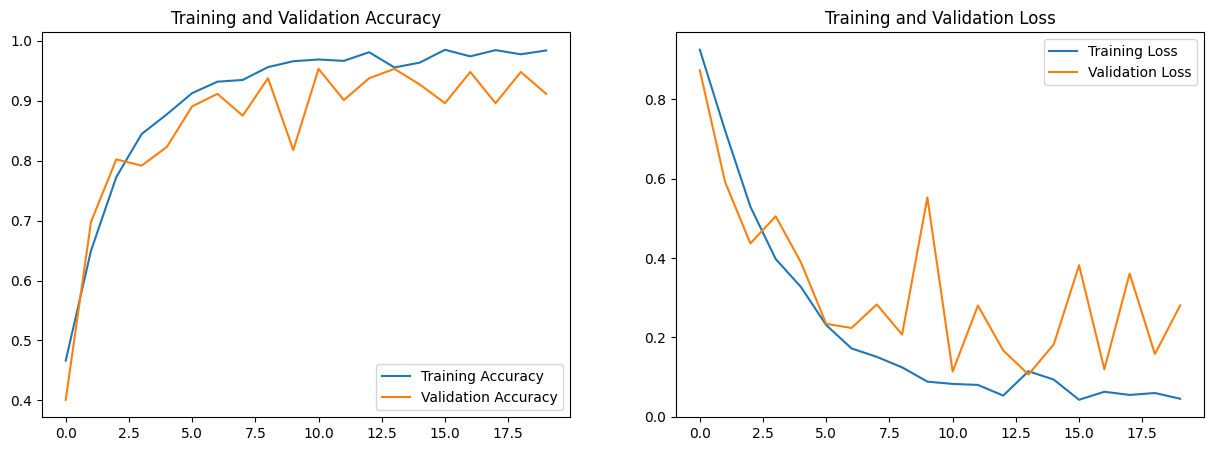

In [120]:
plt.figure(figsize= (15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Late_blight


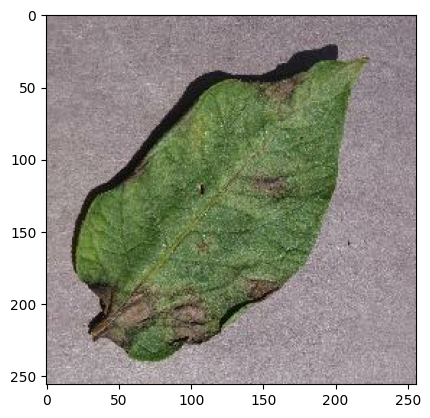

In [112]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [113]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 66ms/step


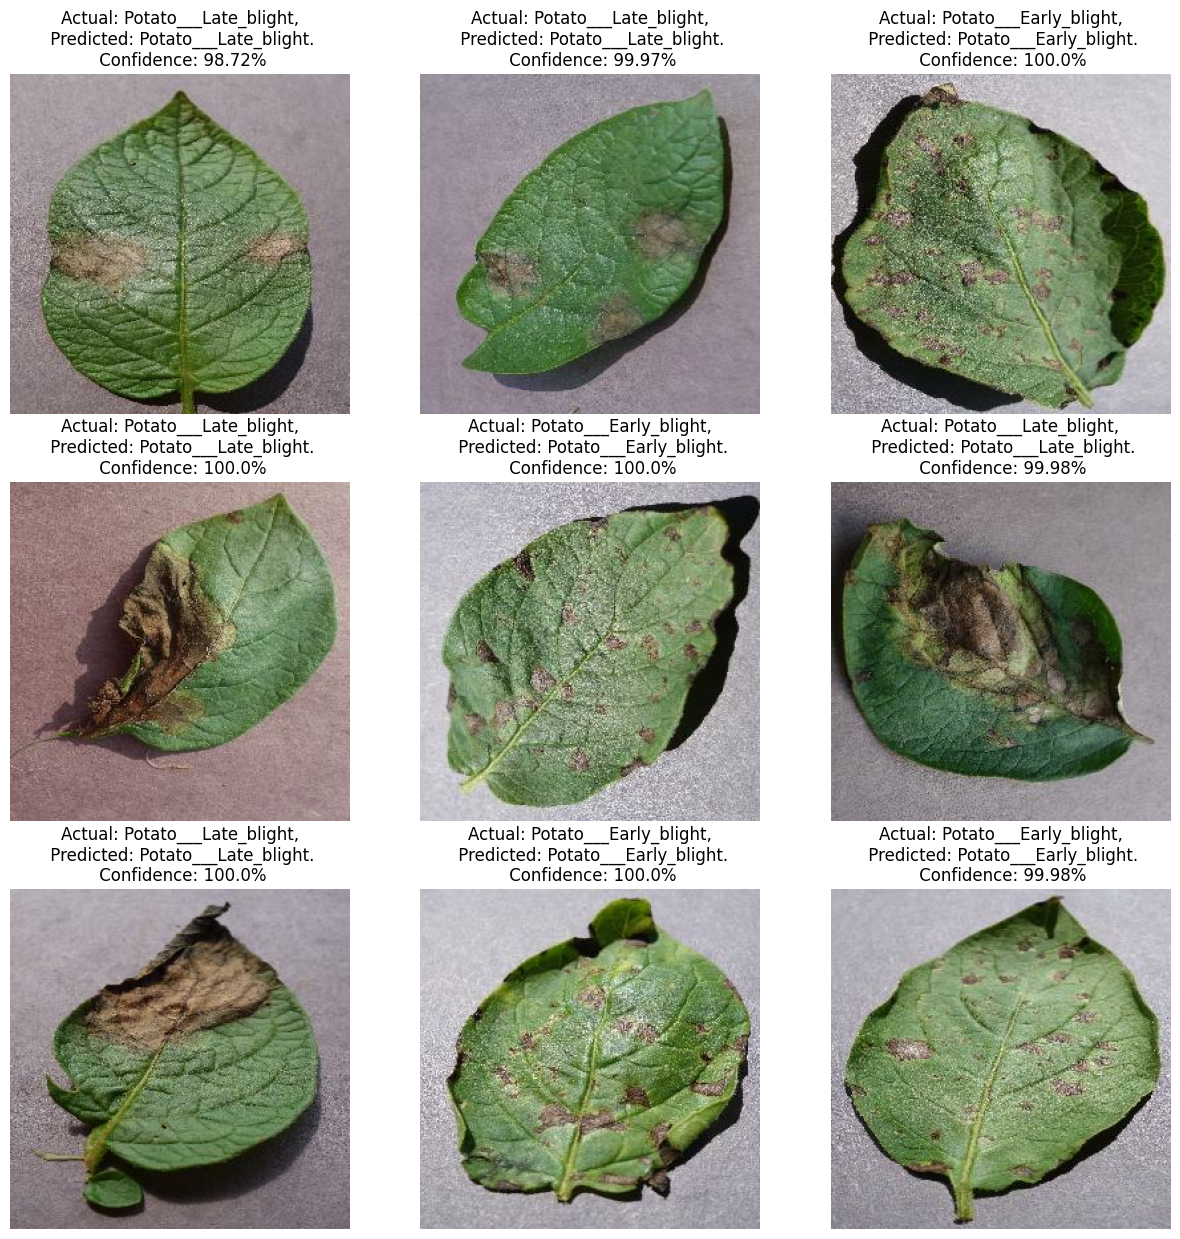

In [114]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")